In [98]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from scipy.spatial.distance import cdist
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin
from kneed import KneeLocator

In [99]:
def read_csv(a, b, path, scaling):
    x = []
    y = []
    users = []
    x_label = ""
    y_label = ""
    reader = ''
    with open(path) as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        lines = 0
        for row in reader:
            if lines >= 1:
                #print(', '.join(row))
                x.append(float(row[a]))
                y.append(float(row[b]))
                users.append(row[0])
                lines += 1
            else:
                x_label = row[a]
                y_label = row[b]
                #print(', '.join(row))
                lines += 1
    
    og_x, og_y = x, y
    if(scaling == "std"):
        x, y = (np.array(x) - np.array(x).mean())/(np.array(x).std()), (np.array(y) - np.array(y).mean())/(np.array(y).std())
    elif(scaling == "norm"):
        x, y = normalize(np.array(x)[:, np.newaxis], axis=0).ravel(), normalize(np.array(y)[:, np.newaxis], axis=0).ravel()
    
    return x, y, x_label, y_label, users, pd.read_csv(path),og_x, og_y


# Choose Category
a, b = 2, 10  # 1,9  2,10  6,10 # DBSCAN 5,7
x, y, x_label, y_label, users, csv_data, og_x, og_y = read_csv(a, b, 'tripadvisor_review.csv', 'std')

**X value before std**

In [100]:
print(og_x)

[1.8, 2.2, 0.8, 1.8, 1.2, 1.28, 1.36, 1.4, 1.76, 1.36, 1.0, 2.96, 1.44, 1.64, 1.68, 2.52, 1.04, 1.96, 1.36, 1.04, 1.44, 1.44, 1.16, 1.44, 0.96, 2.84, 1.68, 1.28, 1.2, 1.16, 1.28, 2.24, 2.0, 1.12, 1.16, 0.96, 1.28, 1.36, 1.52, 1.08, 1.24, 1.48, 1.24, 2.0, 1.64, 1.4, 1.08, 1.2, 2.96, 1.08, 1.2, 1.48, 1.88, 0.64, 1.2, 1.68, 1.16, 1.48, 1.2, 1.4, 1.92, 0.96, 1.12, 1.6, 1.12, 0.72, 1.28, 1.0, 1.08, 1.44, 0.8, 1.04, 2.24, 1.08, 1.36, 2.96, 1.12, 1.76, 1.08, 1.04, 0.92, 1.32, 1.52, 0.92, 0.28, 1.84, 0.76, 1.08, 2.36, 2.08, 1.12, 1.16, 2.04, 1.2, 2.0, 0.96, 1.44, 0.56, 0.88, 1.6, 0.96, 1.12, 2.12, 1.2, 0.84, 0.88, 0.56, 1.2, 0.04, 2.16, 1.8, 1.08, 1.84, 1.36, 1.04, 1.28, 1.72, 1.32, 1.2, 1.6, 1.96, 1.04, 2.68, 0.48, 1.52, 1.36, 1.44, 1.68, 1.48, 1.2, 0.88, 1.68, 1.64, 1.28, 1.64, 0.96, 1.72, 1.16, 1.4, 1.32, 1.28, 1.12, 1.96, 1.04, 1.4, 2.96, 0.6, 1.24, 1.28, 1.52, 1.12, 1.64, 1.6, 1.56, 1.44, 1.16, 1.64, 1.12, 2.04, 1.76, 1.12, 1.08, 1.84, 1.28, 1.16, 1.64, 0.8, 1.04, 2.04, 1.28, 1.16, 0.4, 1

**X value after std**

In [101]:
print(x)

[ 0.93588703  1.77264397 -1.15600533  0.93588703 -0.31924839 -0.151897
  0.01545439  0.09913008  0.85221133  0.01545439 -0.73762686  3.36248217
  0.18280578  0.60118425  0.68485994  2.44204953 -0.65395117  1.27058981
  0.01545439 -0.65395117  0.18280578  0.18280578 -0.40292408  0.18280578
 -0.82130256  3.11145509  0.68485994 -0.151897   -0.31924839 -0.40292408
 -0.151897    1.85631967  1.3542655  -0.48659978 -0.40292408 -0.82130256
 -0.151897    0.01545439  0.35015717 -0.57027547 -0.2355727   0.26648147
 -0.2355727   1.3542655   0.60118425  0.09913008 -0.57027547 -0.31924839
  3.36248217 -0.57027547 -0.31924839  0.26648147  1.10323842 -1.49070811
 -0.31924839  0.68485994 -0.40292408  0.26648147 -0.31924839  0.09913008
  1.18691411 -0.82130256 -0.48659978  0.51750856 -0.48659978 -1.32335672
 -0.151897   -0.73762686 -0.57027547  0.18280578 -1.15600533 -0.65395117
  1.85631967 -0.57027547  0.01545439  3.36248217 -0.48659978  0.85221133
 -0.57027547 -0.65395117 -0.90497825 -0.06822131  0.3

**Y before std**

In [102]:
print(og_y)

[2.42, 2.32, 2.5, 2.86, 2.54, 3.66, 3.22, 2.88, 2.54, 3.12, 2.62, 3.42, 2.34, 2.74, 2.46, 2.32, 2.98, 2.42, 2.8, 2.48, 2.94, 3.22, 3.66, 3.04, 2.46, 2.54, 2.38, 2.4, 2.94, 2.46, 2.34, 2.42, 2.72, 2.74, 3.02, 2.94, 2.9, 3.2, 2.58, 2.42, 3.06, 3.38, 2.88, 2.66, 2.8, 3.38, 3.22, 2.94, 2.72, 2.34, 3.42, 2.86, 3.02, 2.56, 3.42, 3.12, 2.48, 2.88, 2.38, 2.54, 2.34, 2.78, 2.96, 3.04, 3.01, 2.88, 3.34, 2.94, 2.88, 2.54, 2.46, 2.34, 2.58, 3.46, 2.42, 2.32, 3.36, 2.46, 3.06, 2.98, 3.42, 2.54, 3.04, 2.66, 2.58, 3.34, 2.56, 3.12, 2.42, 2.64, 3.26, 2.64, 2.42, 2.38, 2.46, 2.94, 2.82, 2.54, 2.78, 3.1, 2.82, 3.06, 2.42, 2.86, 3.46, 2.46, 2.74, 3.42, 3.18, 2.78, 2.98, 2.86, 2.54, 2.48, 2.34, 2.34, 2.4, 2.94, 2.94, 3.18, 2.5, 2.64, 2.38, 2.38, 2.74, 2.82, 2.98, 2.56, 3.34, 2.78, 2.88, 2.54, 2.94, 2.5, 3.34, 2.54, 2.54, 2.88, 3.06, 3.2, 3.34, 2.96, 3.1, 2.62, 3.02, 3.42, 2.46, 2.62, 2.94, 2.54, 3.1, 2.98, 2.66, 2.78, 2.62, 3.42, 2.86, 3.44, 2.34, 3.36, 2.9, 3.36, 2.54, 2.98, 2.88, 2.74, 2.38, 2.54, 2.34,

**Y after std**

In [103]:
print(y)

[-1.18059095e+00 -1.49190812e+00 -9.31537215e-01  1.89204599e-01
 -8.07010347e-01  2.67974196e+00  1.30994641e+00  2.51468033e-01
 -8.07010347e-01  9.98629242e-01 -5.57956610e-01  1.93258075e+00
 -1.42964469e+00 -1.84376006e-01 -1.05606408e+00 -1.49190812e+00
  5.62785203e-01 -1.18059095e+00  2.41429642e-03 -9.93800649e-01
  4.38258335e-01  1.30994641e+00  2.67974196e+00  7.49575505e-01
 -1.05606408e+00 -8.07010347e-01 -1.30511782e+00 -1.24285439e+00
  4.38258335e-01 -1.05606408e+00 -1.42964469e+00 -1.18059095e+00
 -2.46639440e-01 -1.84376006e-01  6.87312071e-01  4.38258335e-01
  3.13731467e-01  1.24768298e+00 -6.82483478e-01 -1.18059095e+00
  8.11838939e-01  1.80805388e+00  2.51468033e-01 -4.33429742e-01
  2.41429642e-03  1.80805388e+00  1.30994641e+00  4.38258335e-01
 -2.46639440e-01 -1.42964469e+00  1.93258075e+00  1.89204599e-01
  6.87312071e-01 -7.44746913e-01  1.93258075e+00  9.98629242e-01
 -9.93800649e-01  2.51468033e-01 -1.30511782e+00 -8.07010347e-01
 -1.42964469e+00 -5.98491

In [104]:
print(csv_data.describe())
print("Null Value =",csv_data.isnull().sum().sum()==1)

       Category 1  Category 2  Category 3  Category 4  Category 5  Category 6  \
count  980.000000  980.000000  980.000000  980.000000  980.000000  980.000000   
mean     0.893194    1.352612    1.013306    0.532500    0.939735    1.842898   
std      0.326912    0.478280    0.788607    0.279731    0.437430    0.539538   
min      0.340000    0.000000    0.130000    0.150000    0.060000    0.140000   
25%      0.670000    1.080000    0.270000    0.410000    0.640000    1.460000   
50%      0.830000    1.280000    0.820000    0.500000    0.900000    1.800000   
75%      1.020000    1.560000    1.572500    0.580000    1.200000    2.200000   
max      3.220000    3.640000    3.620000    3.440000    3.300000    3.760000   

       Category 7  Category 8  Category 9  Category 10  
count  980.000000  980.000000  980.000000   980.000000  
mean     3.180939    2.835061    1.569439     2.799224  
std      0.007824    0.137505    0.364629     0.321380  
min      3.160000    2.420000    0.740000 

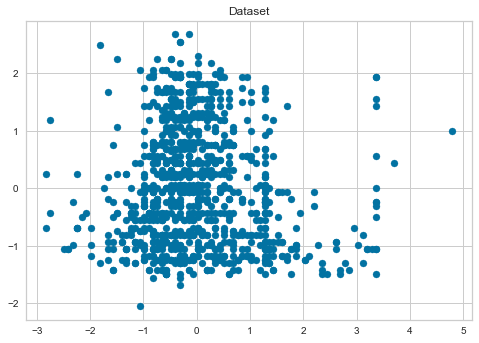

In [105]:
plt.plot()
plt.title('Dataset')
plt.scatter(x, y)
plt.show()

In [106]:
X = np.array(list(zip(x, y))).reshape(len(x), 2)
print(X)

[[ 0.93588703 -1.18059095]
 [ 1.77264397 -1.49190812]
 [-1.15600533 -0.93153721]
 ...
 [-0.06822131  0.68731207]
 [-2.41114075 -1.05606408]
 [-1.6580595  -1.24285439]]


**KMEANS**

In [107]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 11)

XB = X

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

c:\Users\DA4\anaconda3\envs\tensor-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\DA4\anaconda3\envs\tensor-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [108]:
mapping2

{1: 1960.0000000000005,
 2: 1252.8045222698538,
 3: 726.6726605843297,
 4: 586.1861572681712,
 5: 470.1756398549056,
 6: 394.1325635797538,
 7: 332.6946303615973,
 8: 300.79591903547316,
 9: 273.25020450224173,
 10: 244.01711484116507}

In [109]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 1.2381151392544456
2 : 0.9516333585666402
3 : 0.757258004295959
4 : 0.6529575929787501
5 : 0.603328167095648
6 : 0.5563688362129187
7 : 0.5127490941257127
8 : 0.4855604137405055
9 : 0.4569666268656784
10 : 0.4483643436254707


Distortion K-Means : 4


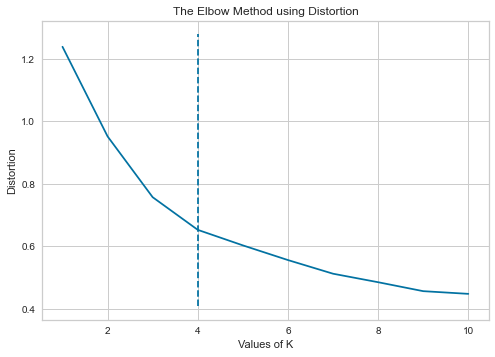

In [110]:
kn_dist = KneeLocator(K, distortions, curve='convex', direction='decreasing')
print(f'Distortion K-Means : {kn_dist.knee}')
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.vlines(kn_dist.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

In [111]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 1960.0000000000005
2 : 1252.8045222698538
3 : 726.6726605843297
4 : 586.1861572681712
5 : 470.1756398549056
6 : 394.1325635797538
7 : 332.6946303615973
8 : 300.79591903547316
9 : 273.25020450224173
10 : 244.01711484116507


Inertia K-Means : 3


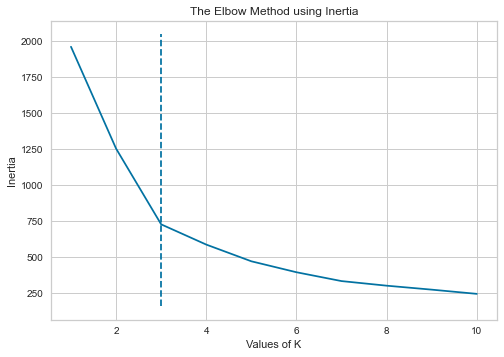

In [112]:
kn_int = KneeLocator(K, inertias, curve='convex', direction='decreasing')
print(f'Inertia K-Means : {kn_int.knee}')
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.vlines(kn_int.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

**Clustering with K-Means**


Converging centres:
[[ 0.07840594  0.73160375]
 [-2.09813167 -0.43804185]
 [ 0.03496531 -0.91597136]]

[[ 0.0039729   0.84264704]
 [-1.53506631 -0.55720645]
 [ 0.30168158 -0.86313724]]

[[-0.04013705  0.93035417]
 [-1.15505985 -0.61705411]
 [ 0.60300329 -0.80294969]]

[[-0.05635384  0.96480343]
 [-0.94263231 -0.64081487]
 [ 0.88331447 -0.77219198]]

[[-0.07839527  0.98410626]
 [-0.81359908 -0.66271731]
 [ 1.0987672  -0.71694225]]

[[-0.09596869  1.0160501 ]
 [-0.71173825 -0.64189185]
 [ 1.27022914 -0.68892452]]

[[-0.11502671  1.03444304]
 [-0.6450863  -0.64692736]
 [ 1.37029683 -0.66211693]]

[[-0.11210557  1.06140026]
 [-0.59992754 -0.63321678]
 [ 1.44212498 -0.64854991]]

[[-0.10812116  1.06292854]
 [-0.59729365 -0.6274216 ]
 [ 1.45230975 -0.6551253 ]]

[[-0.10642108  1.0602159 ]
 [-0.5923482  -0.62469943]
 [ 1.46754952 -0.664922  ]]

[[-0.10642108  1.0602159 ]
 [-0.58989322 -0.62424185]
 [ 1.47287795 -0.66611526]]

[[-0.10720916  1.06292854]
 [-0.58561602 -0.62348146]
 [ 1.4782616

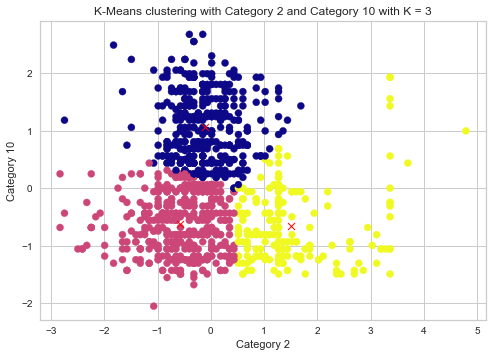

In [113]:
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    # The main loop
    # This loop continues until convergence.
    # You could make it run a set number of times by changing
    # it to say while x > 5, for example, and removing the break
    print("\nConverging centres:")
    while True:
        # 2a. Assign labels based on closest center
        # I am using the pairwise_distances_argmin method to
        # calculate distances between points to centres
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in
        range(n_clusters)])

        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers

        # Print converging centres
        print(centers)
        print()

    return centers, labels

# Choose K value based on Invertia/Distortion
choose_k = 'int'
if(choose_k == 'dist'):
    clust_num = kn_dist.knee
elif(choose_k == 'int'):
    clust_num = kn_int.knee

centers, labels = find_clusters(X, clust_num)
centroids_x = centers[:,0]
centroids_y = centers[:,1]
plt.scatter(centroids_x,centroids_y,marker = "x",linewidths = 1, zorder = 10, c='red')
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='plasma')
plt.title(f'K-Means clustering with Category {a} and Category {b} with K = {clust_num}')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

**See which user belong to the cluster**

In [114]:
from collections import Counter, defaultdict
print("\nNumber of Users in each cluster:")

count_labels = Counter(labels)

# Get cluster indices
clusters_indices = defaultdict(list)
for index, c in enumerate(labels):
    clusters_indices[c].append(index)

# Print countries in each cluster and means
x = 0
while x < clust_num:
    print("\nCluster " + str(x + 1))
    print(f"Total Users : {count_labels[x]}")
    print("Centroid of cluster :",centroids_x[x], centroids_y[x])
    print("----------")
    print(f"User | Category {a} | Category {b}")
    sum_x, sum_y, n = 0, 0, 0
    for i in clusters_indices[x]:
        n += 1
        sum_x += og_x[i]
        sum_y += og_y[i]
        print(f'{users[i]} <> {og_x[i]} <> {og_y[i]}')

    print("----------")
    print(f"Mean Category {a} = {sum_x/n} [Cluster {str(x + 1)}]")
    print(f"Mean Category {b} = {sum_y/n} [Cluster {str(x + 1)}]")
    print("----------")
    x+=1


Number of Users in each cluster:

Cluster 1
Total Users : 367
Centroid of cluster : -0.10720916372130553 1.062928537396891
----------
User | Category 2 | Category 10
User 6 <> 1.28 <> 3.66
User 7 <> 1.36 <> 3.22
User 8 <> 1.4 <> 2.88
User 10 <> 1.36 <> 3.12
User 17 <> 1.04 <> 2.98
User 21 <> 1.44 <> 2.94
User 22 <> 1.44 <> 3.22
User 23 <> 1.16 <> 3.66
User 24 <> 1.44 <> 3.04
User 29 <> 1.2 <> 2.94
User 35 <> 1.16 <> 3.02
User 36 <> 0.96 <> 2.94
User 37 <> 1.28 <> 2.9
User 38 <> 1.36 <> 3.2
User 41 <> 1.24 <> 3.06
User 42 <> 1.48 <> 3.38
User 43 <> 1.24 <> 2.88
User 46 <> 1.4 <> 3.38
User 47 <> 1.08 <> 3.22
User 48 <> 1.2 <> 2.94
User 51 <> 1.2 <> 3.42
User 52 <> 1.48 <> 2.86
User 53 <> 1.88 <> 3.02
User 55 <> 1.2 <> 3.42
User 56 <> 1.68 <> 3.12
User 58 <> 1.48 <> 2.88
User 63 <> 1.12 <> 2.96
User 64 <> 1.6 <> 3.04
User 65 <> 1.12 <> 3.01
User 67 <> 1.28 <> 3.34
User 68 <> 1.0 <> 2.94
User 74 <> 1.08 <> 3.46
User 77 <> 1.12 <> 3.36
User 79 <> 1.08 <> 3.06
User 80 <> 1.04 <> 2.98
User 8

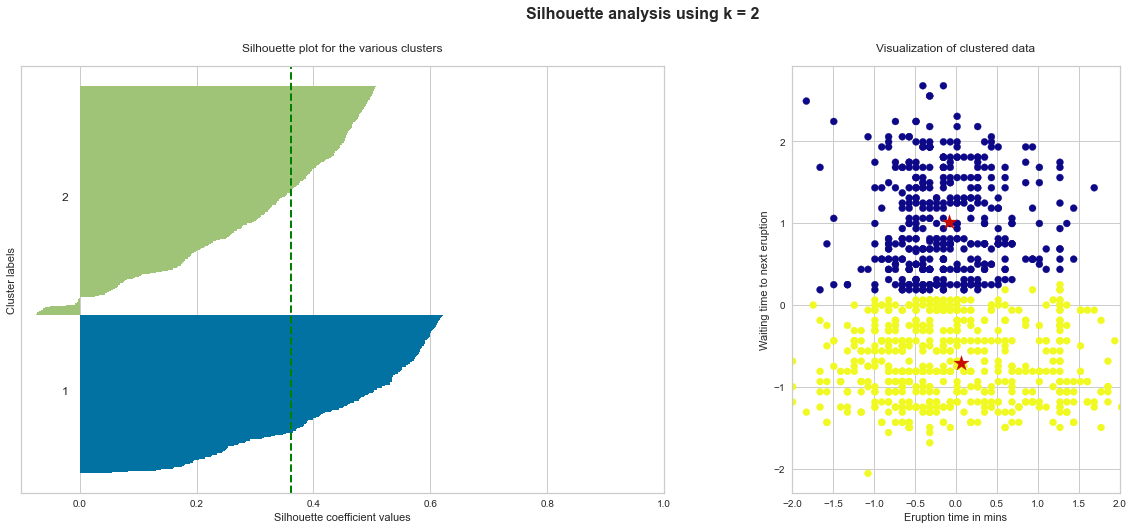

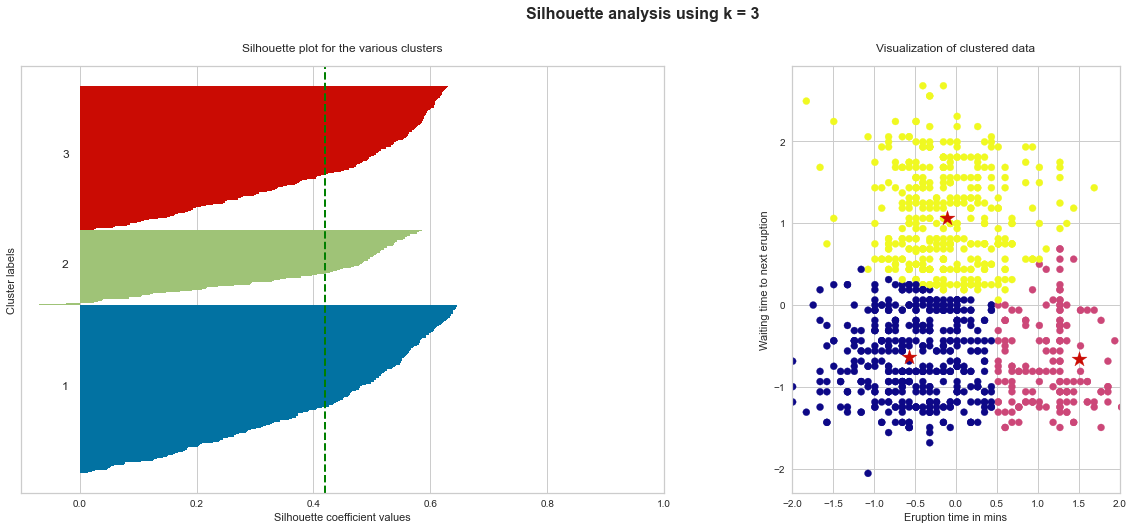

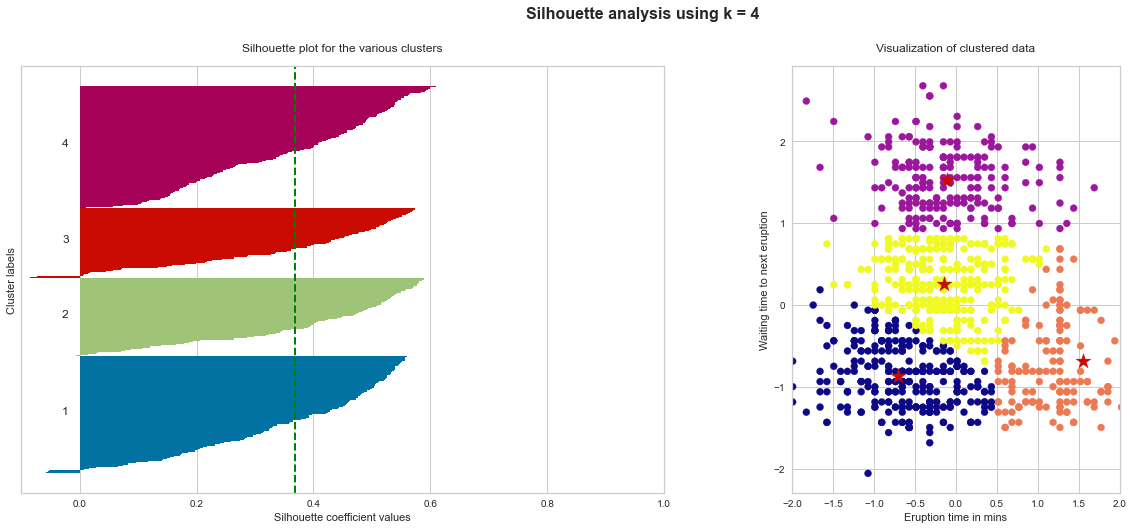

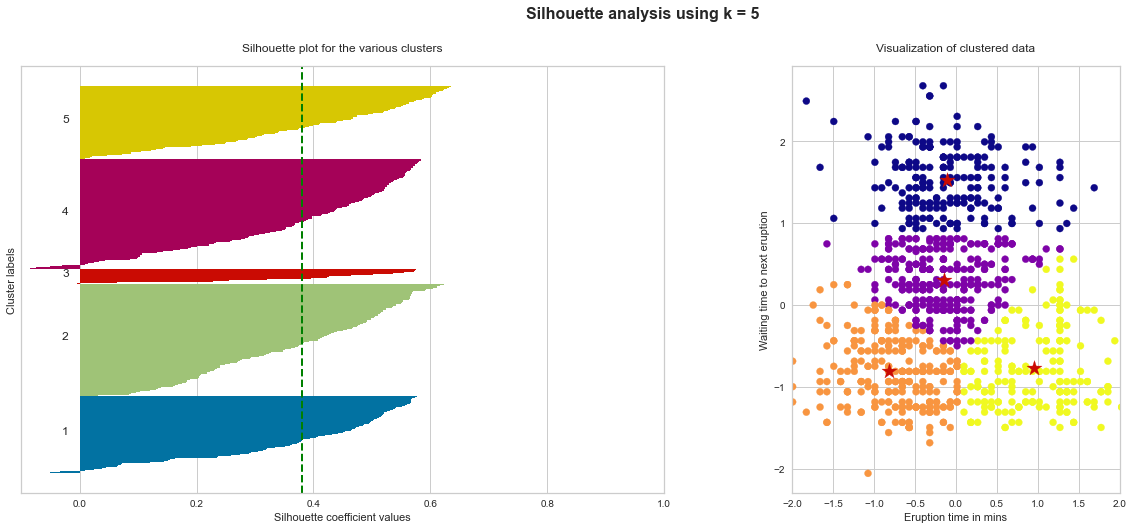

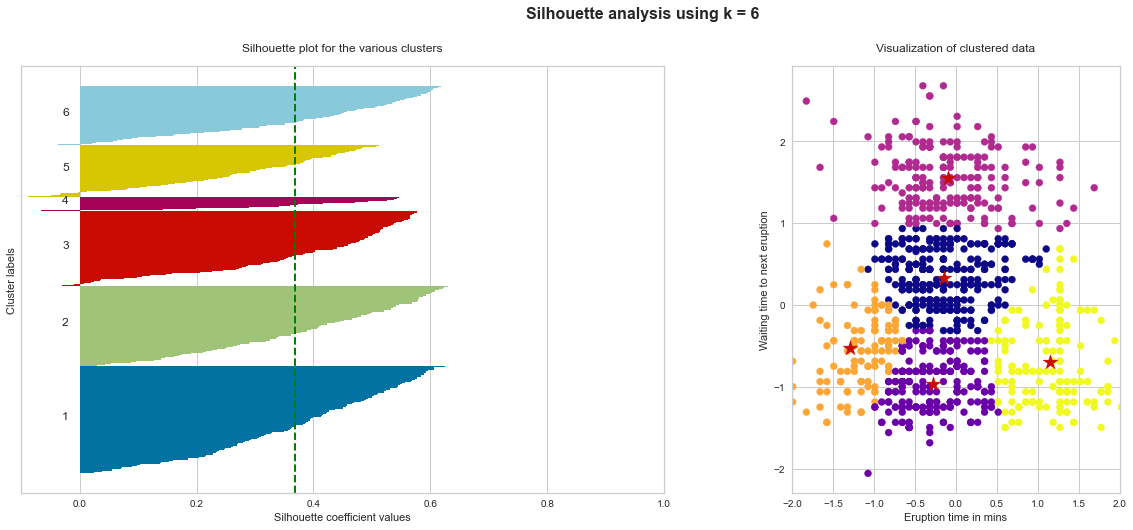

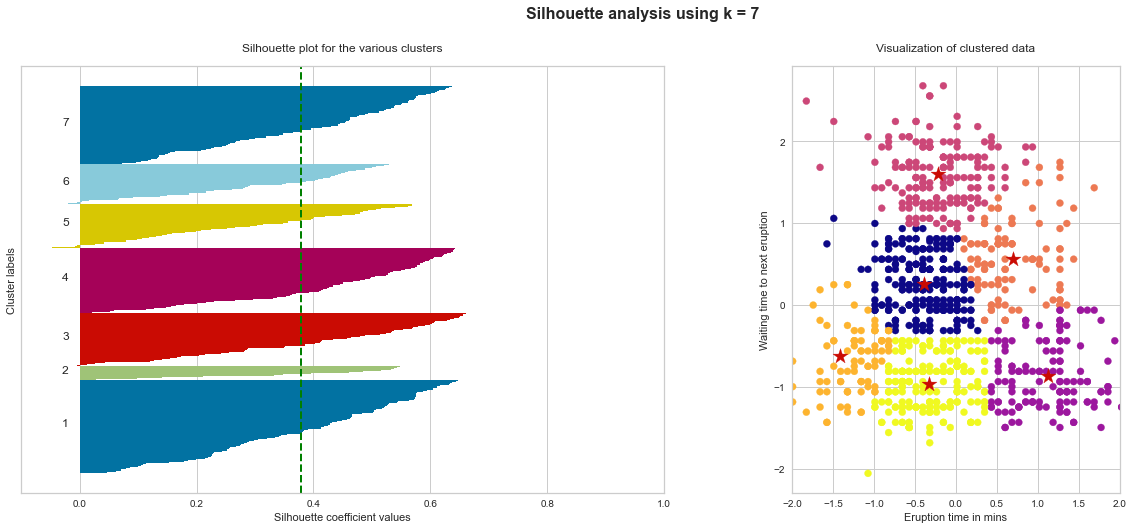

In [115]:
from sklearn.metrics import silhouette_samples, silhouette_score

for i, k in enumerate([2, 3, 4, 5, 6, 7]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X[:, 0], X[:, 1], c=labels, cmap="plasma")
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250, cmap="plasma")
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);